In [1427]:
import copy
import operator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from numpy import array
pd.options.mode.chained_assignment=None

df_proposals = pd.read_csv('data/opps-props-orgs-questions-22.7.13.csv')
df_proposals.head(20)

,opportunity,propsId,updatedAt,organization,anonymousProponentName,challengeScore,scenarioScore,priceScore,teamquestions,status,...,scenarioWeight,priceWeight,orgsId,legalName,city,region,country,orgSize,maxQuestionScore,questionsOppVersion
0,c9995fe1-0826-4f9a-88d9-f109c7f67b3c,29feae17-ee5e-46e0-9c99-d2bf123329bb,2020-11-25 01:03:32.285000 +00:00,e6c10ce9-dd46-4fa3-a45b-bdb9998515c1,Proponent 2,NaN,NaN,NaN,13.30,EVALUATED_QUESTIONS,...,25,10,e6c10ce9-dd46-4fa3-a45b-bdb9998515c1,FreshBI Reporting Inc.,Victoria,BC,Canada,3,25,e7b64570-c0e6-4652-b824-2b823f494b2f
1,f1f6aca3-7143-41bc-99a7-8ce7014ac242,3751f6cb-7982-462c-8127-11546ead5a09,2020-05-28 02:47:21.822000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 13,100.00,76.00,100.000000,13.00,AWARDED,...,25,10,6dd688c3-3367-4463-8f69-d0353a2429f4,Countable Web Productions Inc.,Vancouver,British Columbia (BC),Canada,10,15,030383cd-1cf3-46d1-817a-0ba63b35999b
2,c9995fe1-0826-4f9a-88d9-f109c7f67b3c,42cfc86c-6f59-48d5-b9bd-d47142cd1c2a,2020-12-16 19:23:49.171000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 6,84.50,71.00,100.000000,17.50,NOT_AWARDED,...,25,10,6dd688c3-3367-4463-8f69-d0353a2429f4,Countable Web Productions Inc.,Vancouver,British Columbia (BC),Canada,10,25,e7b64570-c0e6-4652-b824-2b823f494b2f
3,ba6b5506-fe2f-42a6-a32b-92982fe417d2,3d530552-7fb6-46ef-b4e2-2faa40635b8f,2021-02-01 20:59:10.882000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 7,80.00,81.80,100.000000,25.00,NOT_AWARDED,...,30,5,6dd688c3-3367-4463-8f69-d0353a2429f4,Countable Web Productions Inc.,Vancouver,British Columbia (BC),Canada,10,35,f172245d-3714-4bca-90ce-6aad9222adc9
4,e1cd1588-2c43-492b-a167-7f28cd720ae7,d39e2c30-3a2b-4770-b712-9cb2b06fcf2d,2021-03-11 19:12:29.738000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 3,91.00,76.00,100.000000,40.00,NOT_AWARDED,...,30,15,6dd688c3-3367-4463-8f69-d0353a2429f4,Countable Web Productions Inc.,Vancouver,British Columbia (BC),Canada,10,70,6fb0ad34-96e0-4ff8-92e4-b0ddaac60295
5,cbcf9c02-3b1c-4c35-a42a-6478d6a0e902,3258db63-04fb-4171-a697-6d3aae008ae3,2021-03-19 21:13:07.399000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 14,NaN,NaN,NaN,17.00,EVALUATED_QUESTIONS,...,25,10,6dd688c3-3367-4463-8f69-d0353a2429f4,Countable Web Productions Inc.,Vancouver,British Columbia (BC),Canada,10,25,eb7b397c-7b96-4234-b7ea-ccea8ce54c6a
6,b6cdccf4-0dbc-491a-a7d8-866d6c5edd6d,6f1e484c-d14c-43b6-abcd-1cfde0c04cef,2022-07-08 20:31:01.995000 +00:00,df2f8ede-99ce-4c3a-9be3-798db5f481de,Proponent 2,NaN,NaN,NaN,122.00,NOT_AWARDED,...,25,10,df2f8ede-99ce-4c3a-9be3-798db5f481de,OXD Consulting Ltd.,Vancouver,BC,Canada,33,215,58efbad2-4d6e-49f3-abe1-56576538dc4d
7,cbcf9c02-3b1c-4c35-a42a-6478d6a0e902,4c7b0328-3705-4515-a7b5-c46c309aacaf,2021-03-19 21:08:05.287000 +00:00,2dedd03f-d018-4bdb-a70e-e42e2b43cc99,Proponent 9,NaN,NaN,NaN,19.00,EVALUATED_QUESTIONS,...,25,10,2dedd03f-d018-4bdb-a70e-e42e2b43cc99,Vivid Solutions Inc.,Victoria,BC,Canada,13,25,eb7b397c-7b96-4234-b7ea-ccea8ce54c6a
8,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,a722d4ef-eafe-4ba9-b20e-b29ea4639b9f,2020-11-25 20:12:21.261000 +00:00,211b188b-4510-45a7-a406-56b904ea8548,Proponent 3,98.90,91.00,100.000000,23.00,AWARDED,...,35,5,211b188b-4510-45a7-a406-56b904ea8548,FreshWorks Studio,Victoria,BC,Canada,36,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c
9,ba6b5506-fe2f-42a6-a32b-92982fe417d2,e26b7df8-7674-41a6-ae22-9e82d869d4cc,2021-02-01 20:59:10.882000 +00:00,211b188b-4510-45a7-a406-56b904ea8548,Proponent 8,92.00,41.80,93.396225,30.00,NOT_AWARDED,...,30,5,211b188b-4510-45a7-a406-56b904ea8548,FreshWorks Studio,Victoria,BC,Canada,36,35,f172245d-3714-4bca-90ce-6aad9222adc9


In [1428]:
df_proposals.shape

(129, 30)

In [1429]:
## see if there are any null values to determine if rows can be eliminated
df_proposals.isna().sum()

opportunity                0
propsId                    0
updatedAt                  0
organization               0
anonymousProponentName    12
challengeScore            75
scenarioScore             82
priceScore                82
teamquestions             13
status                     0
id                         0
updatedAt.1                0
versionsId                 0
versionsCreatedAt          0
totalMaxBudget             0
minTeamMembers             5
mandatorySkills            0
optionalSkills            31
questionsWeight            0
codeChallengeWeight        0
scenarioWeight             0
priceWeight                0
orgsId                     0
legalName                  0
city                       0
region                     0
country                    0
orgSize                    0
maxQuestionScore           0
questionsOppVersion        0
dtype: int64

In [1430]:

# replace instances of NaN with 0 in columns with calculations
df_proposals['teamquestions']=df_proposals['teamquestions'].fillna(0)
df_proposals['challengeScore']=df_proposals['challengeScore'].fillna(0)
df_proposals['scenarioScore']=df_proposals['scenarioScore'].fillna(0)
df_proposals['priceScore']=df_proposals['priceScore'].fillna(0)
df_proposals['optionalSkills']=df_proposals['optionalSkills'].fillna('')

df_proposals.isna().sum()


opportunity                0
propsId                    0
updatedAt                  0
organization               0
anonymousProponentName    12
challengeScore             0
scenarioScore              0
priceScore                 0
teamquestions              0
status                     0
id                         0
updatedAt.1                0
versionsId                 0
versionsCreatedAt          0
totalMaxBudget             0
minTeamMembers             5
mandatorySkills            0
optionalSkills             0
questionsWeight            0
codeChallengeWeight        0
scenarioWeight             0
priceWeight                0
orgsId                     0
legalName                  0
city                       0
region                     0
country                    0
orgSize                    0
maxQuestionScore           0
questionsOppVersion        0
dtype: int64

In [1431]:


# use the combined weight and score to come up with a calculated score for each phase and total
df_proposals['tq_calculated']=(df_proposals['teamquestions'] / df_proposals['maxQuestionScore']) * 100 * df_proposals['questionsWeight'] / 100
df_proposals['cc_calculated']=df_proposals['codeChallengeWeight'] * df_proposals['challengeScore'] / 100
df_proposals['ts_calculated']=df_proposals['scenarioWeight'] * df_proposals['scenarioScore'] / 100
df_proposals['p_calculated']=df_proposals['priceWeight'] * df_proposals['priceScore'] / 100
df_proposals['total_score']=df_proposals['cc_calculated'] + df_proposals['ts_calculated'] + df_proposals['p_calculated'] + df_proposals['tq_calculated']
df_proposals

,opportunity,propsId,updatedAt,organization,anonymousProponentName,challengeScore,scenarioScore,priceScore,teamquestions,status,...,region,country,orgSize,maxQuestionScore,questionsOppVersion,tq_calculated,cc_calculated,ts_calculated,p_calculated,total_score
0,c9995fe1-0826-4f9a-88d9-f109c7f67b3c,29feae17-ee5e-46e0-9c99-d2bf123329bb,2020-11-25 01:03:32.285000 +00:00,e6c10ce9-dd46-4fa3-a45b-bdb9998515c1,Proponent 2,0.00,0.00,0.000000,13.30,EVALUATED_QUESTIONS,...,BC,Canada,3,25,e7b64570-c0e6-4652-b824-2b823f494b2f,13.300000,0.000,0.0000,0.000000,13.300000
1,f1f6aca3-7143-41bc-99a7-8ce7014ac242,3751f6cb-7982-462c-8127-11546ead5a09,2020-05-28 02:47:21.822000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 13,100.00,76.00,100.000000,13.00,AWARDED,...,British Columbia (BC),Canada,10,15,030383cd-1cf3-46d1-817a-0ba63b35999b,21.666667,40.000,19.0000,10.000000,90.666667
2,c9995fe1-0826-4f9a-88d9-f109c7f67b3c,42cfc86c-6f59-48d5-b9bd-d47142cd1c2a,2020-12-16 19:23:49.171000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 6,84.50,71.00,100.000000,17.50,NOT_AWARDED,...,British Columbia (BC),Canada,10,25,e7b64570-c0e6-4652-b824-2b823f494b2f,17.500000,33.800,17.7500,10.000000,79.050000
3,ba6b5506-fe2f-42a6-a32b-92982fe417d2,3d530552-7fb6-46ef-b4e2-2faa40635b8f,2021-02-01 20:59:10.882000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 7,80.00,81.80,100.000000,25.00,NOT_AWARDED,...,British Columbia (BC),Canada,10,35,f172245d-3714-4bca-90ce-6aad9222adc9,25.000000,24.000,24.5400,5.000000,78.540000
4,e1cd1588-2c43-492b-a167-7f28cd720ae7,d39e2c30-3a2b-4770-b712-9cb2b06fcf2d,2021-03-11 19:12:29.738000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 3,91.00,76.00,100.000000,40.00,NOT_AWARDED,...,British Columbia (BC),Canada,10,70,6fb0ad34-96e0-4ff8-92e4-b0ddaac60295,14.285714,27.300,22.8000,15.000000,79.385714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,5e32d776-a4b6-48f3-adb5-8fd6c38462cb,81b9e88f-f92b-4fc6-899f-0a5416303c65,2020-09-04 22:15:28.123000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 1,100.00,78.50,89.841415,65.25,NOT_AWARDED,...,BC,Canada,55,100,168268e9-9198-495a-a9eb-807f00b0d541,26.100000,0.000,39.2500,8.984141,74.334142
125,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,f97765ac-edea-4beb-a807-c9df3a2500f3,2020-09-14 20:07:11.850000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 1,76.30,0.00,0.000000,14.00,EVALUATED_CODE_CHALLENGE,...,BC,Canada,55,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c,14.000000,26.705,0.0000,0.000000,40.705000
126,ba6b5506-fe2f-42a6-a32b-92982fe417d2,2d487791-f9b3-4b07-96ac-f446ff287078,2021-01-15 23:36:22.300000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 9,0.00,0.00,0.000000,18.00,EVALUATED_QUESTIONS,...,BC,Canada,55,35,f172245d-3714-4bca-90ce-6aad9222adc9,18.000000,0.000,0.0000,0.000000,18.000000
127,7e66873f-fa48-47b3-9bc7-5667bb7ce254,1c4c3efe-6c0d-42e7-8d55-1f42a28c2f39,2022-02-24 21:54:50.719000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 4,83.42,55.67,58.673470,16.33,NOT_AWARDED,...,BC,Canada,55,30,26269fe5-0a00-4323-a9c8-98a92401a4ea,13.608333,33.368,13.9175,5.867347,66.761180


In [1432]:
# see if there are any outliers that verifies calculations
df_proposals['total_score'].describe()

count    129.000000
mean      36.950020
std       33.176340
min        0.000000
25%       11.666667
50%       16.750000
75%       76.524000
max       94.465000
Name: total_score, dtype: float64

<AxesSubplot:>

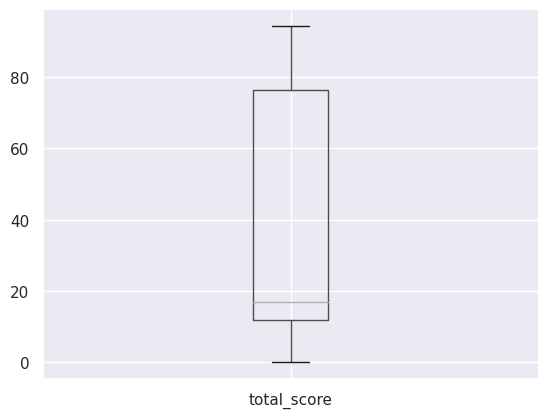

In [1433]:
df_proposals.boxplot(column='total_score')

In [1434]:
# drop rows that contain zero for total score
df_props = df_proposals.loc[(df_proposals['total_score'] != 0)]
df_props

,opportunity,propsId,updatedAt,organization,anonymousProponentName,challengeScore,scenarioScore,priceScore,teamquestions,status,...,region,country,orgSize,maxQuestionScore,questionsOppVersion,tq_calculated,cc_calculated,ts_calculated,p_calculated,total_score
0,c9995fe1-0826-4f9a-88d9-f109c7f67b3c,29feae17-ee5e-46e0-9c99-d2bf123329bb,2020-11-25 01:03:32.285000 +00:00,e6c10ce9-dd46-4fa3-a45b-bdb9998515c1,Proponent 2,0.00,0.00,0.000000,13.30,EVALUATED_QUESTIONS,...,BC,Canada,3,25,e7b64570-c0e6-4652-b824-2b823f494b2f,13.300000,0.000,0.0000,0.000000,13.300000
1,f1f6aca3-7143-41bc-99a7-8ce7014ac242,3751f6cb-7982-462c-8127-11546ead5a09,2020-05-28 02:47:21.822000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 13,100.00,76.00,100.000000,13.00,AWARDED,...,British Columbia (BC),Canada,10,15,030383cd-1cf3-46d1-817a-0ba63b35999b,21.666667,40.000,19.0000,10.000000,90.666667
2,c9995fe1-0826-4f9a-88d9-f109c7f67b3c,42cfc86c-6f59-48d5-b9bd-d47142cd1c2a,2020-12-16 19:23:49.171000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 6,84.50,71.00,100.000000,17.50,NOT_AWARDED,...,British Columbia (BC),Canada,10,25,e7b64570-c0e6-4652-b824-2b823f494b2f,17.500000,33.800,17.7500,10.000000,79.050000
3,ba6b5506-fe2f-42a6-a32b-92982fe417d2,3d530552-7fb6-46ef-b4e2-2faa40635b8f,2021-02-01 20:59:10.882000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 7,80.00,81.80,100.000000,25.00,NOT_AWARDED,...,British Columbia (BC),Canada,10,35,f172245d-3714-4bca-90ce-6aad9222adc9,25.000000,24.000,24.5400,5.000000,78.540000
4,e1cd1588-2c43-492b-a167-7f28cd720ae7,d39e2c30-3a2b-4770-b712-9cb2b06fcf2d,2021-03-11 19:12:29.738000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 3,91.00,76.00,100.000000,40.00,NOT_AWARDED,...,British Columbia (BC),Canada,10,70,6fb0ad34-96e0-4ff8-92e4-b0ddaac60295,14.285714,27.300,22.8000,15.000000,79.385714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,5e32d776-a4b6-48f3-adb5-8fd6c38462cb,81b9e88f-f92b-4fc6-899f-0a5416303c65,2020-09-04 22:15:28.123000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 1,100.00,78.50,89.841415,65.25,NOT_AWARDED,...,BC,Canada,55,100,168268e9-9198-495a-a9eb-807f00b0d541,26.100000,0.000,39.2500,8.984141,74.334142
125,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,f97765ac-edea-4beb-a807-c9df3a2500f3,2020-09-14 20:07:11.850000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 1,76.30,0.00,0.000000,14.00,EVALUATED_CODE_CHALLENGE,...,BC,Canada,55,25,85cbfcdf-c8d7-427c-8404-62c59b741d1c,14.000000,26.705,0.0000,0.000000,40.705000
126,ba6b5506-fe2f-42a6-a32b-92982fe417d2,2d487791-f9b3-4b07-96ac-f446ff287078,2021-01-15 23:36:22.300000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 9,0.00,0.00,0.000000,18.00,EVALUATED_QUESTIONS,...,BC,Canada,55,35,f172245d-3714-4bca-90ce-6aad9222adc9,18.000000,0.000,0.0000,0.000000,18.000000
127,7e66873f-fa48-47b3-9bc7-5667bb7ce254,1c4c3efe-6c0d-42e7-8d55-1f42a28c2f39,2022-02-24 21:54:50.719000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 4,83.42,55.67,58.673470,16.33,NOT_AWARDED,...,BC,Canada,55,30,26269fe5-0a00-4323-a9c8-98a92401a4ea,13.608333,33.368,13.9175,5.867347,66.761180


In [1435]:

# rank the teamquestions and group by opportunity
for method in ['average']:
    df_props['overallRank'] = df_props.groupby('opportunity')['total_score'].rank(method, ascending=False)
    df_props['tq_rank'] = df_props.groupby('opportunity')['tq_calculated'].rank(method, ascending=False)
    df_props['ts_rank'] = df_props.groupby('opportunity')['ts_calculated'].rank(method, ascending=False)
    df_props['cc_rank'] = df_props.groupby('opportunity')['cc_calculated'].rank(method, ascending=False)
    df_props['p_rank'] = df_props.groupby('opportunity')['p_calculated'].rank(method, ascending=False)
df_props
# df_nan_proposals = df_proposals.dropna(axis=0,subset=["anonymousProponentName","teamquestions"]).drop_duplicates()
# df_nan_proposals.shape

,opportunity,propsId,updatedAt,organization,anonymousProponentName,challengeScore,scenarioScore,priceScore,teamquestions,status,...,tq_calculated,cc_calculated,ts_calculated,p_calculated,total_score,overallRank,tq_rank,ts_rank,cc_rank,p_rank
0,c9995fe1-0826-4f9a-88d9-f109c7f67b3c,29feae17-ee5e-46e0-9c99-d2bf123329bb,2020-11-25 01:03:32.285000 +00:00,e6c10ce9-dd46-4fa3-a45b-bdb9998515c1,Proponent 2,0.00,0.00,0.000000,13.30,EVALUATED_QUESTIONS,...,13.300000,0.000,0.0000,0.000000,13.300000,5.0,5.0,5.0,5.5,5.0
1,f1f6aca3-7143-41bc-99a7-8ce7014ac242,3751f6cb-7982-462c-8127-11546ead5a09,2020-05-28 02:47:21.822000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 13,100.00,76.00,100.000000,13.00,AWARDED,...,21.666667,40.000,19.0000,10.000000,90.666667,1.0,1.0,2.0,2.0,1.0
2,c9995fe1-0826-4f9a-88d9-f109c7f67b3c,42cfc86c-6f59-48d5-b9bd-d47142cd1c2a,2020-12-16 19:23:49.171000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 6,84.50,71.00,100.000000,17.50,NOT_AWARDED,...,17.500000,33.800,17.7500,10.000000,79.050000,2.0,2.0,2.0,3.0,1.0
3,ba6b5506-fe2f-42a6-a32b-92982fe417d2,3d530552-7fb6-46ef-b4e2-2faa40635b8f,2021-02-01 20:59:10.882000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 7,80.00,81.80,100.000000,25.00,NOT_AWARDED,...,25.000000,24.000,24.5400,5.000000,78.540000,2.0,4.0,2.0,3.0,1.0
4,e1cd1588-2c43-492b-a167-7f28cd720ae7,d39e2c30-3a2b-4770-b712-9cb2b06fcf2d,2021-03-11 19:12:29.738000 +00:00,6dd688c3-3367-4463-8f69-d0353a2429f4,Proponent 3,91.00,76.00,100.000000,40.00,NOT_AWARDED,...,14.285714,27.300,22.8000,15.000000,79.385714,2.0,2.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,5e32d776-a4b6-48f3-adb5-8fd6c38462cb,81b9e88f-f92b-4fc6-899f-0a5416303c65,2020-09-04 22:15:28.123000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 1,100.00,78.50,89.841415,65.25,NOT_AWARDED,...,26.100000,0.000,39.2500,8.984141,74.334142,3.0,4.0,3.0,3.0,3.0
125,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,f97765ac-edea-4beb-a807-c9df3a2500f3,2020-09-14 20:07:11.850000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 1,76.30,0.00,0.000000,14.00,EVALUATED_CODE_CHALLENGE,...,14.000000,26.705,0.0000,0.000000,40.705000,2.0,2.0,3.0,2.0,3.0
126,ba6b5506-fe2f-42a6-a32b-92982fe417d2,2d487791-f9b3-4b07-96ac-f446ff287078,2021-01-15 23:36:22.300000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 9,0.00,0.00,0.000000,18.00,EVALUATED_QUESTIONS,...,18.000000,0.000,0.0000,0.000000,18.000000,8.5,8.5,6.5,7.0,6.5
127,7e66873f-fa48-47b3-9bc7-5667bb7ce254,1c4c3efe-6c0d-42e7-8d55-1f42a28c2f39,2022-02-24 21:54:50.719000 +00:00,445eb43c-71e8-49a1-8878-1bd57f60436a,Proponent 4,83.42,55.67,58.673470,16.33,NOT_AWARDED,...,13.608333,33.368,13.9175,5.867347,66.761180,3.0,4.0,3.0,2.0,2.0


<AxesSubplot:title={'center':'overall rank distribution'}, ylabel='Frequency'>

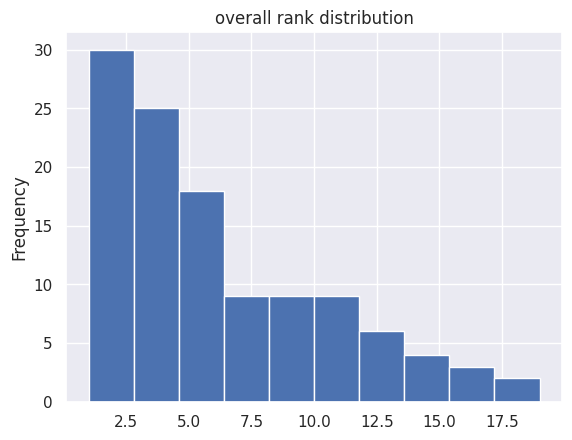

In [1436]:
df_props['overallRank'].plot(kind='hist', title='overall rank distribution')

,count
city,
abbotsford,1
westbank,1
washington,1
sidney,1
saanichton,1
whitehorse,1
ottawa,1
port coquitlam,1
new westminster,2


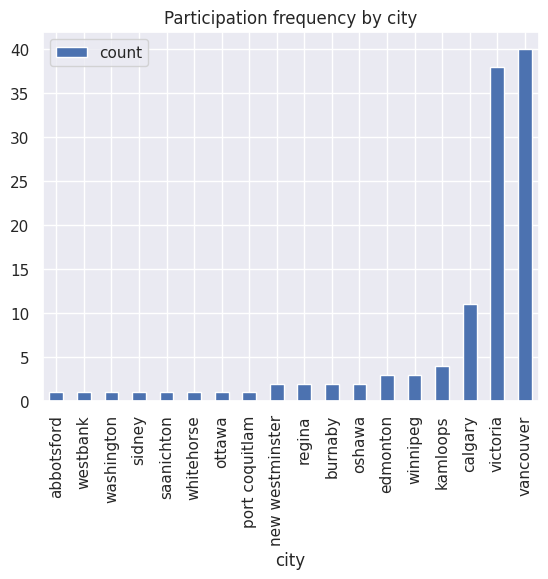

In [1437]:
df_props['city'] = df_props['city'].str.lower()
df_props['city'] = df_props['city'].str.strip()
df_props['count'] = 1
df_props[['city','count']].groupby('city').count().sort_values(by='count',ascending=True).plot.bar(title='Participation frequency by city')
df_count = df_props[['city','count']].groupby('city').count().sort_values(by='count',ascending=True)
df_count

In [1438]:
# number of proponents
df_count['count'].sum()

115

In [1439]:
# number of unique organizations
df_orgs = df_props.drop_duplicates(subset=['orgsId'])
df_orgs[['legalName','city','region','country']]

,legalName,city,region,country
0,FreshBI Reporting Inc.,victoria,BC,Canada
1,Countable Web Productions Inc.,vancouver,British Columbia (BC),Canada
6,OXD Consulting Ltd.,vancouver,BC,Canada
7,Vivid Solutions Inc.,victoria,BC,Canada
8,FreshWorks Studio,victoria,BC,Canada
16,TTT Studios,vancouver,BC,Canada
18,Prakash Consulting Incorporated,vancouver,BC,Canada
20,ESIT Advanced Solutions (a DXC Technology Comp...,victoria,BC,Canada
21,Quartech Systems Limited,victoria,BC,Canada
24,"Development Seed, Inc.",washington,DC,United States


                                                    count
legalName                                                
ADN Systems Inc.                                        1
ITK Consulting Inc.                                     1
Zeenau Technologies Inc.                                1
Nortal Solutions B.C.                                   1
OXD Consulting Ltd.                                     1
Optimus Information Inc.                                1
PACIFIC INTELLIGENT AUTOMATION LTD.                     1
PARC Systems Incorporated                               1
Prakash Consulting Incorporated                         1
Punchcard Systems                                       1
PwC Canada                                              1
Quicksilver Software Development Inc                    1
Randstad                                                1
Traction Sales And Marketing Inc.                       1
Vivid Solutions Inc.                                    1
Wolf & Crown I

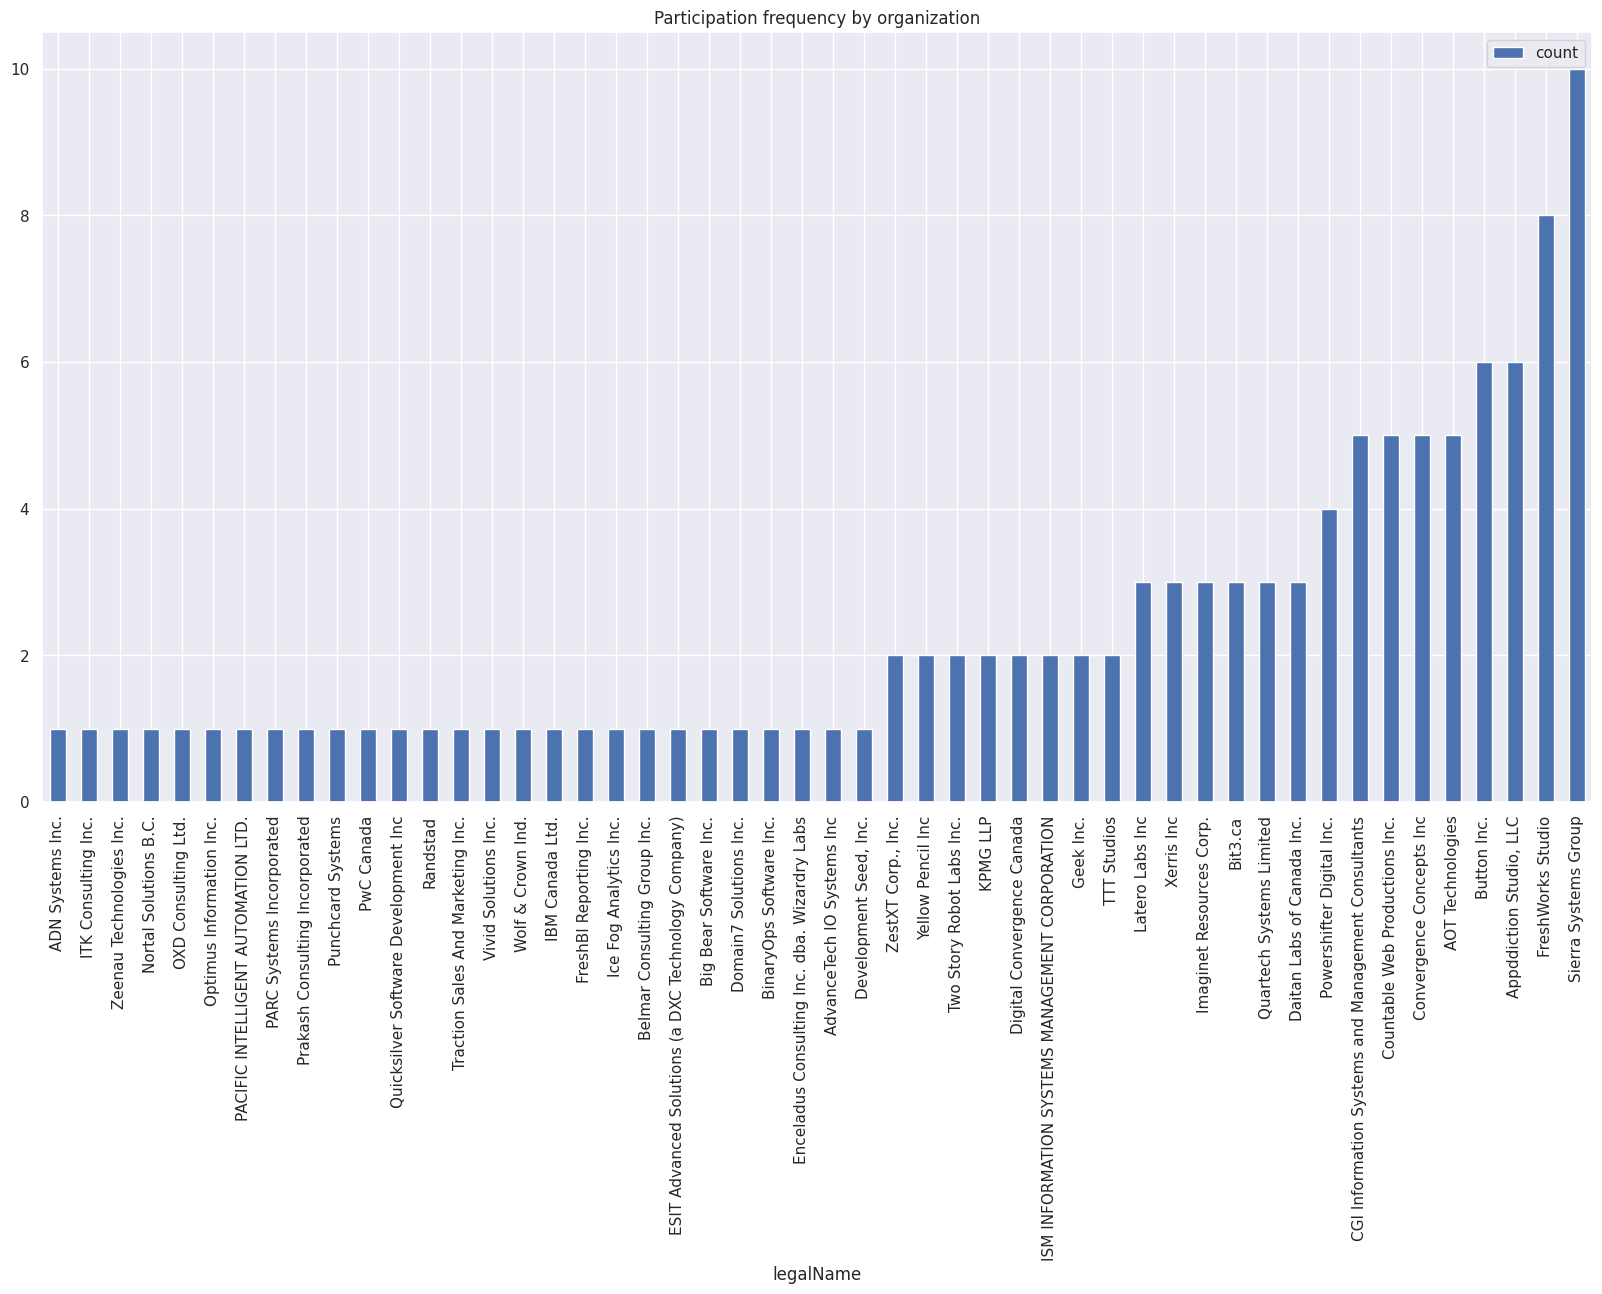

In [1440]:
df_org_plot = df_props
df_org_plot[['legalName','count']].groupby('legalName').count().sort_values(by='count',ascending=True).plot(kind='bar', title='Participation frequency by organization', figsize=(20,10))
df_org_count = df_org_plot[['legalName','count']].groupby('legalName').count().sort_values(by='count',ascending=True)
print(df_org_count)

In [1441]:
# drop rows that contain zero for total score
df_props = df_props.loc[(df_props['overallRank'] <= 4)]

In [1442]:
# number of proponents making it past phase 1
df_props['count'].sum()

55

In [1443]:
# take a subset of the dataframe
df_sub = df_props[['anonymousProponentName','city','region','country','orgSize','mandatorySkills','optionalSkills','tq_calculated','ts_calculated','p_calculated','cc_calculated','tq_rank','cc_rank','ts_rank','p_rank','overallRank','opportunity','status','total_score','legalName','count']]

# aggregate all rows by opportunity
df_agg=df_sub.groupby('opportunity').aggregate(lambda x: ','.join(map(str, x)))
df_agg
# df_sub.loc[(df_sub['cc_rank'] > 4) | (df_sub['ts_rank'] > 4) | (df_sub['p_rank'] > 4) | (df_sub['tq_rank'] > 4)]
#df_sub.loc[(df_sub['opportunity'] == 'ba6b5506-fe2f-42a6-a32b-92982fe417d2') | (df_sub['opportunity'] == '5e32d776-a4b6-48f3-adb5-8fd6c38462cb') | (df_sub['opportunity'] == '7e66873f-fa48-47b3-9bc7-5667bb7ce254')]

,anonymousProponentName,city,region,country,orgSize,mandatorySkills,optionalSkills,tq_calculated,ts_calculated,p_calculated,cc_calculated,tq_rank,cc_rank,ts_rank,p_rank,overallRank,status,total_score,legalName,count
opportunity,,,,,,,,,,,,,,,,,,,,
04003a5f-f609-469f-91bb-f3c6ac56bed7,"Proponent 1,Proponent 2","victoria,victoria","BC,BC","Canada,Canada","31,23","{Front-End Development,React,NodeJS,Back-End D...",",","16.52941176470588,13.0","17.85,12.25","9.846154,10.0","26.7,29.1","1.0,2.0","2.0,1.0","1.0,2.0","2.0,1.0","1.0,2.0","AWARDED,NOT_AWARDED","70.92556576470588,64.35","Quartech Systems Limited,Button Inc.","1,1"
442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,"Proponent 3,Proponent 4,Proponent 2,Proponent 1","victoria,vancouver,calgary,victoria","BC,BC,Alberta,BC","Canada,Canada,Canada,Canada","36,5,12,55","{Agile,Delivery Management,Microsoft Azure,Scr...","{Back-End Development,Data Analysis,Data Visua...","23.0,8.0,13.0,14.000000000000002","31.85,0.0,0.0,0.0","5.0,0.0,0.0,0.0","34.615,0.0,0.0,26.705","1.0,4.0,3.0,2.0","1.0,3.5,3.5,2.0","1.0,3.0,3.0,3.0","1.0,3.0,3.0,3.0","1.0,4.0,3.0,2.0","AWARDED,EVALUATED_CODE_CHALLENGE,EVALUATED_COD...","94.465,8.0,13.0,40.705","FreshWorks Studio,Prakash Consulting Incorpora...","1,1,1,1"
5e32d776-a4b6-48f3-adb5-8fd6c38462cb,"Proponent 4,Proponent 2,Proponent 6,Proponent 1","victoria,vancouver,burnaby,victoria","BC,British Columbia,BC,BC","Canada,Canada,Canada,Canada","13,44,14,55","{Salesforce,Scrum},{Salesforce,Scrum},{Salesfo...","{OpenShift,DevOps,HL7},{OpenShift,DevOps,HL7},...","35.3,31.1,29.4,26.1","43.5,40.5,31.0,39.25","8.923077000000001,10.0,9.0625,8.9841415","0.0,0.0,0.0,0.0","1.0,2.0,3.0,4.0","3.0,3.0,3.0,3.0","1.0,2.0,4.0,3.0","4.0,1.0,2.0,3.0","1.0,2.0,4.0,3.0","AWARDED,NOT_AWARDED,NOT_AWARDED,NOT_AWARDED","87.72307699999999,81.6,69.4625,74.3341415","PwC Canada,Sierra Systems Group,Traction Sales...","1,1,1,1"
76d04eca-334f-44b0-ac74-08910851715f,"Proponent 12,Proponent 11,Proponent 2,Proponen...","victoria,victoria,vancouver,victoria","BC,BC,British Columbia,BC","Canada,Canada,Canada,Canada","23,24,44,55","{Agile,Back-End Development,Data Analysis,Fron...","{Geographic Information Systems,Data Visualiza...","19.0625,16.875,18.125,16.875","30.024,34.444,29.288,16.488","9.5,10.0,9.768638,9.774769000000001","24.5125,23.7775,22.0425,20.26","1.0,3.5,2.0,3.5","1.0,2.0,3.0,4.0","2.0,1.0,3.0,4.0","4.0,1.0,3.0,2.0","2.0,1.0,3.0,4.0","NOT_AWARDED,AWARDED,NOT_AWARDED,NOT_AWARDED","83.099,85.0965,79.224138,63.397769000000004","Button Inc.,Daitan Labs of Canada Inc.,Sierra ...","1,1,1,1"
7e66873f-fa48-47b3-9bc7-5667bb7ce254,"Proponent 5,Proponent 3,Proponent 1,Proponent 4","victoria,vancouver,vancouver,victoria","BC,BC,BC,BC","Canada,Canada,Canada,Canada","36,15,27,55","{Scrum,Service Design,Solution Architecture,Ba...",",,,","20.283333333333335,17.775,14.441666666666668,1...","21.25,0.0,14.6675,13.9175","5.75,0.0,10.0,5.867347","37.56399999999999,27.4,32.044000000000004,33.368","1.0,2.0,3.0,4.0","1.0,4.0,3.0,2.0","1.0,5.0,2.0,3.0","3.0,5.0,1.0,2.0","1.0,4.0,2.0,3.0","AWARDED,EVALUATED_CODE_CHALLENGE,NOT_AWARDED,N...","84.84733333333332,45.175,71.15316666666666,66....","FreshWorks Studio,Powershifter Digital Inc.,Co...","1,1,1,1"
ab3f56b2-c309-491b-9c9b-68b24ebee5eb,"Proponent 1,Proponent 2","victoria,kamloops","BC,BC","Canada,Canada","36,7","{Agile,Back-End Development,Bootstrap UI Toolk...",",","19.166666666666668,11.041666666666664","16.0825,22.6675","9.479163,10.0","35.52,38.816","1.0,2.0","2.0,1.0","2.0,1.0","2.0,1.0","2.0,1.0","NOT_AWARDED,AWARDED","80.24832966666668,82.52516666666668","FreshWorks Studio,Digital Convergence Canada","1,1"
b6cdccf4-0dbc-491a-a7d8-866d6c5edd6d,"Proponent 1,Proponent 3,Proponent 6,Proponent 5","victoria,victoria,victoria,vancouver","BC,BC,BC,British Columbia","Canada,Canada,Canada,Canada","36,10,29,44","{Agile,Data Visualization,DevOps,Front-End Dev...",",,,","17.674418604651162,15.755813953488376,20.81395...","21.3325,20.1675,15.25,13.3325","9.2000275

In [1444]:
df_awarded = df_sub.loc[(df_sub["status"] == 'AWARDED')]
df_awarded

,anonymousProponentName,city,region,country,orgSize,mandatorySkills,optionalSkills,tq_calculated,ts_calculated,p_calculated,...,tq_rank,cc_rank,ts_rank,p_rank,overallRank,opportunity,status,total_score,legalName,count
1,Proponent 13,vancouver,British Columbia (BC),Canada,10,"{User Interface Design,User Experience Design,...","{Scrum,Wireframing,Data Visualization,HTML,RES...",21.666667,19.0000,10.000000,...,1.0,2.0,2.0,1.0,1.0,f1f6aca3-7143-41bc-99a7-8ce7014ac242,AWARDED,90.666667,Countable Web Productions Inc.,1
8,Proponent 3,victoria,BC,Canada,36,"{Agile,Delivery Management,Microsoft Azure,Scr...","{Back-End Development,Data Analysis,Data Visua...",23.000000,31.8500,5.000000,...,1.0,1.0,1.0,1.0,1.0,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,AWARDED,94.465000,FreshWorks Studio,1
11,Proponent 5,victoria,BC,Canada,36,"{Agile,DevOps,Back-End Development,Git,User Ex...","{Delivery Management,Azure Cloud,Amazon Web Se...",14.400000,34.7520,9.200000,...,1.0,3.0,1.0,3.5,1.0,b7c75650-f86a-4971-a738-a04a26f5d7c9,AWARDED,83.768000,FreshWorks Studio,1
13,Proponent 5,victoria,BC,Canada,36,"{Scrum,Service Design,Solution Architecture,Ba...",,20.283333,21.2500,5.750000,...,1.0,1.0,1.0,3.0,1.0,7e66873f-fa48-47b3-9bc7-5667bb7ce254,AWARDED,84.847333,FreshWorks Studio,1
15,Proponent 1,victoria,BC,Canada,36,"{Agile,Data Visualization,DevOps,Front-End Dev...",,17.674419,21.3325,9.200027,...,3.0,1.0,1.0,4.0,1.0,b6cdccf4-0dbc-491a-a7d8-866d6c5edd6d,AWARDED,83.606946,FreshWorks Studio,1
22,Proponent 1,victoria,BC,Canada,31,"{Front-End Development,React,NodeJS,Back-End D...",,16.529412,17.8500,9.846154,...,1.0,2.0,1.0,2.0,1.0,04003a5f-f609-469f-91bb-f3c6ac56bed7,AWARDED,70.925566,Quartech Systems Limited,1
25,Proponent 4,victoria,BC,Canada,13,"{Salesforce,Scrum}","{OpenShift,DevOps,HL7}",35.300000,43.5000,8.923077,...,1.0,3.0,1.0,4.0,1.0,5e32d776-a4b6-48f3-adb5-8fd6c38462cb,AWARDED,87.723077,PwC Canada,1
26,Proponent 1,victoria,BC,Canada,10,"{OpenShift,DevOps,Agile,User Experience Design...","{Angular,Bash,MongoDB,JavaScript,Oracle,Amazon...",18.500000,34.6840,9.647059,...,4.0,1.0,1.0,2.0,1.0,f508d747-8877-46f8-8818-59f71a65416a,AWARDED,85.461059,Bit3.ca,1
39,Proponent 5,victoria,BC,Canada,29,"{Agile,Back-End Development,DevOps,User Interf...","{OpenShift,VueJS,Jenkins,Security Engineering,...",20.000000,24.2750,9.497488,...,2.5,1.0,1.0,3.0,1.0,cbcf9c02-3b1c-4c35-a42a-6478d6a0e902,AWARDED,92.772488,AOT Technologies,1
61,Proponent 11,victoria,BC,Canada,24,"{Agile,Back-End Development,Data Analysis,Fron...","{Geographic Information Systems,Data Visualiza...",16.875000,34.4440,10.000000,...,3.5,2.0,1.0,1.0,1.0,76d04eca-334f-44b0-ac74-08910851715f,AWARDED,85.096500,Daitan Labs of Canada Inc.,1


<AxesSubplot:title={'center':'Awarded contracts by city'}, xlabel='city'>

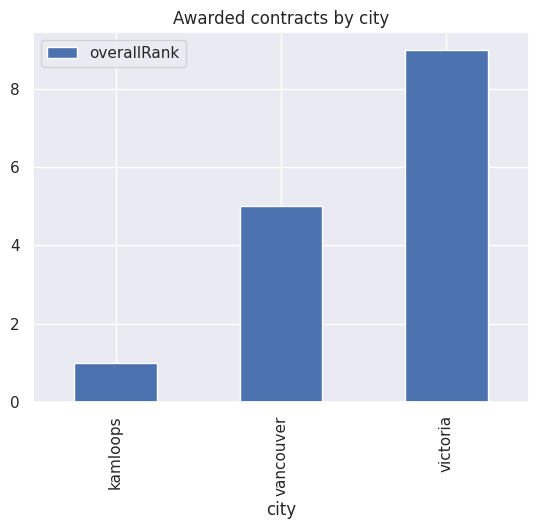

In [1445]:
df_awarded[['city','overallRank']].groupby('city').count().sort_values(by='overallRank',ascending=True).plot.bar(title='Awarded contracts by city')

In [1446]:
# average org size for awarded contracts
df_awarded['orgSize'].mean()

29.6

<AxesSubplot:title={'center':'Awarded contracts grouped by organization'}, xlabel='legalName'>

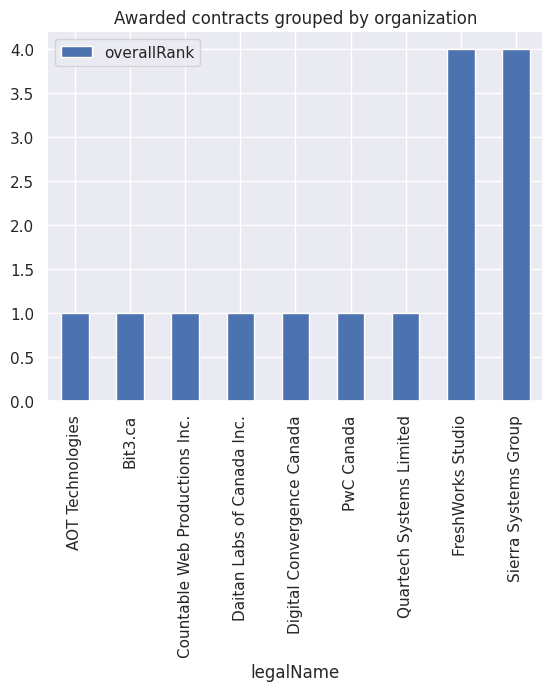

In [1447]:
df_awarded[['legalName','overallRank']].groupby('legalName').count().sort_values(by='overallRank',ascending=True).plot.bar(title='Awarded contracts grouped by organization')

In [1448]:
df_skills_mand = df_sub['mandatorySkills'].loc[(df_sub["status"] == 'AWARDED')]
df_skills_opt = df_sub['optionalSkills'].loc[(df_sub["status"] == 'AWARDED')]
skills_list_mand = df_skills_mand.to_list()
skills_list_opt = df_skills_opt.to_list()

# set vars
char1 = "{"
char2 = '}'
dict_mand = {}
dict_opt = {}
freq_mand = {}
freq_opt = {}
idx = 0

# string manipulation, remove unwanted characters
res_mand = [ele.replace(char1, '') for ele in skills_list_mand]
res2_mand = [ele.replace(char2, '') for ele in res_mand]
res_opt = [ele.replace(char1, '') for ele in skills_list_opt]
res2_opt = [ele.replace(char2, '') for ele in res_opt]

# convert each item to an array, save to multi-dimensional
for i in res2_mand:
    dict_mand[idx] = i.split(',')
    idx += 1
dict_mand

for i in res2_opt:
    dict_opt[idx] = i.split(',')
    idx += 1
dict_opt

# avoid runtime error
dict_mand_copy = copy.copy(dict_mand)
dict_opt_copy = copy.copy(dict_opt)

# count the frequency of words, save words as keys in new multi-dimensional array
for item in dict_mand_copy.values():
    for i in item:
        if i in freq_mand:
            freq_mand[i] += 1
        else:
            freq_mand[i] = 1

for item in dict_opt_copy.values():
    for i in item:
        if i == '':
            continue
        if i in freq_opt:
            freq_opt[i] += 1
        else:
            freq_opt[i] = 1

# sort the array in ascending order
# dict(sorted(freq.items(), key=lambda i: i[1]))
sorted(freq_mand.items(), key=operator.itemgetter(1))

[('Microsoft Azure', 1),
 ('React-Redux', 1),
 ('Flyway', 1),
 ('Service Design', 1),
 ('Solution Architecture', 1),
 ('Backend Development', 1),
 ('Technical Architecture', 1),
 ('DevOps Engineering', 1),
 ('Privacy', 1),
 ('MSSQL', 1),
 ('Authentication Skills ', 1),
 ('Open ID Connect ', 1),
 ('GitHub', 1),
 ('Leaflet', 1),
 ('BC Datawarehouse integration', 1),
 ('Cloud Hosting', 1),
 ('Container ', 1),
 ('Technical Architecture ', 1),
 ('Delivery Managment', 1),
 ('UAT', 1),
 ('QA', 1),
 ('UI Design', 1),
 ('UX Design', 1),
 ('Salesforce', 1),
 ('Data Analysis', 1),
 ('solution architecture', 1),
 ('data integration design', 1),
 ('AI', 1),
 ('UI/UX', 1),
 ('Machine Learning', 1),
 ('PowerBI', 1),
 ('GIS', 1),
 ('Data Base Administrator', 1),
 ('Business Analysis', 1),
 ('Geographic Information Systems', 1),
 ('User Flows', 1),
 ('VueJS', 1),
 ('ArgoCD', 1),
 ('OAuth', 1),
 ('Patroni', 1),
 ('Tekton', 1),
 ('OpenShift Pipelines', 1),
 ('Bootstrap UI Toolkit', 1),
 ('SQL', 1),
 ('jQ

In [1449]:
sorted(freq_opt.items(), key=operator.itemgetter(1))

[('Scrum', 1),
 ('Wireframing', 1),
 ('HTML', 1),
 ('RESTful API Development', 1),
 ('PostgreSQL', 1),
 ('Docker', 1),
 ('networking', 1),
 ('Back-End Development', 1),
 ('Data Analysis', 1),
 ('Microsoft Dynamics', 1),
 ('Quality Assurance', 1),
 ('Penetration Testing', 1),
 ('Delivery Management', 1),
 ('Azure Cloud', 1),
 ('User Research', 1),
 ('DevOps', 1),
 ('HL7', 1),
 ('Angular', 1),
 ('Bash', 1),
 ('JavaScript', 1),
 ('Oracle', 1),
 ('Microsoft Azure', 1),
 ('VueJS', 1),
 ('Security Engineering', 1),
 ('Flask', 1),
 ('Django', 1),
 ('identity management', 1),
 ('Data Science', 1),
 ('iOS App Development', 1),
 ('Android App Development', 1),
 ('MongoDB', 2),
 ('Jenkins', 2),
 ('Geographic Information Systems', 2),
 ('Data Visualization', 3),
 ('Amazon Web Services', 3),
 ('OpenShift', 3)]

In [1450]:
# average team size
df_props['minTeamMembers'].loc[(df_props["status"] == 'AWARDED')].mean()

3.9285714285714284

In [1451]:
df_weights = df_props[['opportunity','questionsWeight','codeChallengeWeight','scenarioWeight','priceWeight']].loc[(df_sub["status"] == 'AWARDED')]
df_weights

,opportunity,questionsWeight,codeChallengeWeight,scenarioWeight,priceWeight
1,f1f6aca3-7143-41bc-99a7-8ce7014ac242,25,40,25,10
8,442c6000-4a93-4d29-bf4f-3a7c5fcb8b28,25,35,35,5
11,b7c75650-f86a-4971-a738-a04a26f5d7c9,20,30,40,10
13,7e66873f-fa48-47b3-9bc7-5667bb7ce254,25,40,25,10
15,b6cdccf4-0dbc-491a-a7d8-866d6c5edd6d,25,40,25,10
22,04003a5f-f609-469f-91bb-f3c6ac56bed7,25,30,35,10
25,5e32d776-a4b6-48f3-adb5-8fd6c38462cb,40,0,50,10
26,f508d747-8877-46f8-8818-59f71a65416a,25,25,40,10
39,cbcf9c02-3b1c-4c35-a42a-6478d6a0e902,25,40,25,10
61,76d04eca-334f-44b0-ac74-08910851715f,25,25,40,10


<AxesSubplot:xlabel='opportunity'>

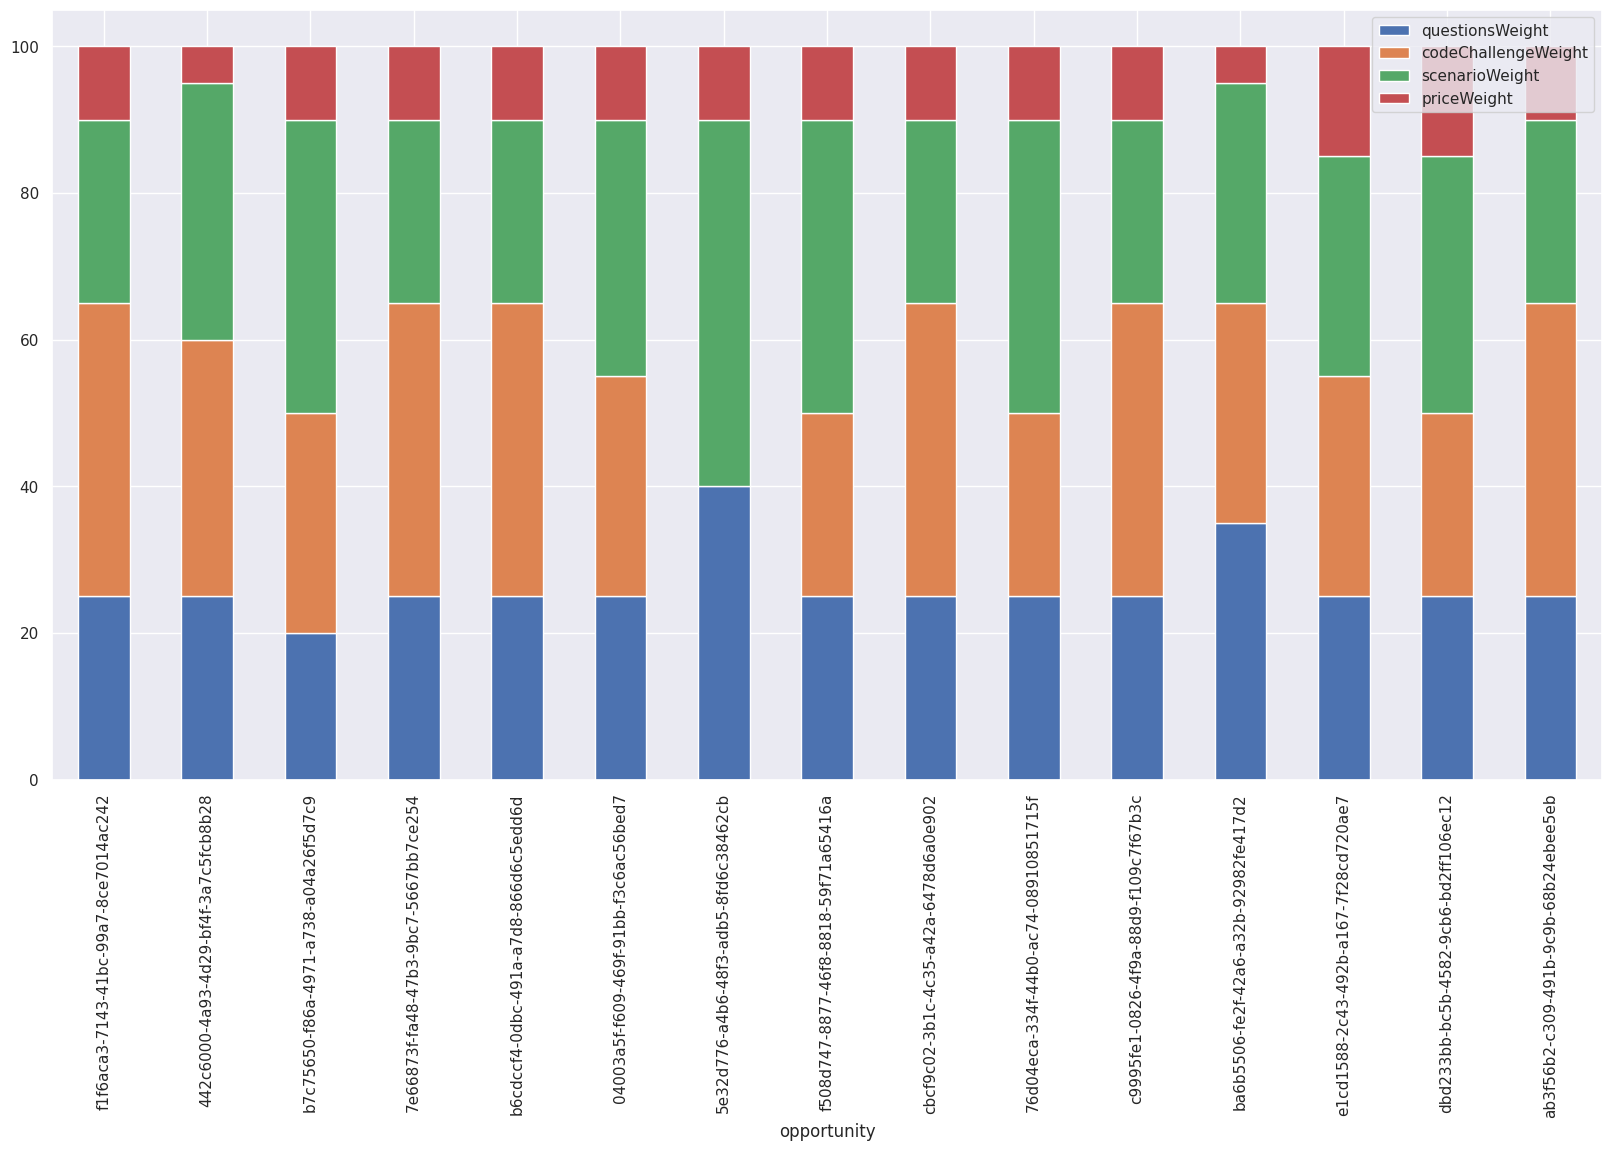

In [1452]:
df_weights.plot(x='opportunity', y=['questionsWeight', 'codeChallengeWeight', 'scenarioWeight', 'priceWeight'], kind='bar', figsize=(20,10), stacked=True)

In [1453]:
print('TQ: ',df_weights['questionsWeight'].mean())
print('CC: ',df_weights['codeChallengeWeight'].mean())
print('TS: ',df_weights['scenarioWeight'].mean())
print('P:  ',df_weights['priceWeight'].mean())

TQ:  26.333333333333332
CC:  31.333333333333332
TS:  32.333333333333336
P:   10.0


In [1454]:
# there is a negative correlation with team questions and rank, which is consistent with the lower the score for team questions the higher the rank, or the greatest number
df_sub["tq_rank"].corr(df_sub['overallRank'], method="spearman")

0.3633363942472053

In [1455]:
# team scenario scores are negatively correlated with rank, consistent with lower scores contributing to a greater rank number
df_sub["ts_rank"].corr(df_sub['overallRank'], method="spearman")

0.9668931450258608

In [1456]:
df_sub["cc_rank"].corr(df_sub['overallRank'], method="spearman")

0.5907328644823897

In [1457]:
df_sub["p_rank"].corr(df_sub['overallRank'], method="spearman")

0.25051747284183407

In [1458]:
#sns.pairplot(df_sub, kind='reg')

In [1459]:
# groupby rank doesn't handle equal values in a way that works well here, so manually adjusting
df_sub.loc[(df_sub['ts_rank'] > 4), 'ts_rank'] = 4
df_sub.loc[(df_sub['p_rank'] > 4), 'p_rank'] = 4

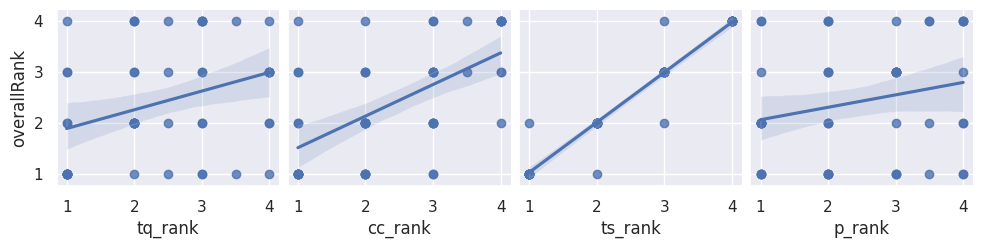

In [1460]:
sns.pairplot(df_sub, x_vars=['tq_rank','cc_rank','ts_rank','p_rank'], y_vars='overallRank', kind='reg')

<AxesSubplot:>

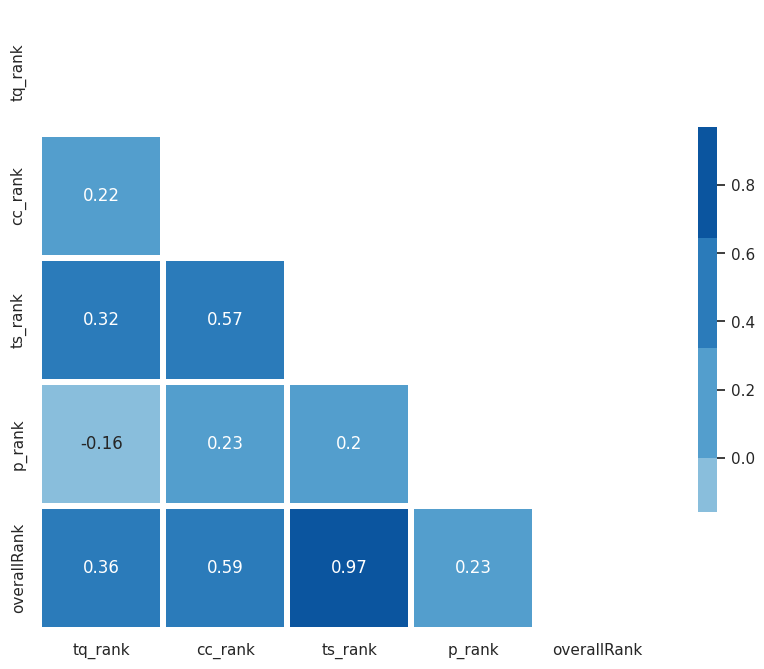

In [1461]:
# correlation matrix of the dataframe
sns.set_theme(style='white')
corr = df_sub[['tq_rank','cc_rank','ts_rank','p_rank','overallRank']].corr(method='spearman')
mask = np.triu(corr)
f, ax = plt.subplots(figsize=(10,10))
cmap = sns.color_palette('Blues')
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=3, cbar_kws={'shrink': .5}, annot=True)

In [1462]:
# R value is between -1 and 1, or correlation coefficient matrix, uses Pearson unlike above which uses spearman
# measures the direction and magnitude of the relationship between variables
np.corrcoef(df_sub['ts_rank'], df_sub['overallRank'])

array([[1.        , 0.96989918],
       [0.96989918, 1.        ]])

In [1463]:
# covariance matrix, describes the directional relationship of linearity between two variables to determine where a linear relationship exists
df_sub.cov()

,orgSize,tq_calculated,ts_calculated,p_calculated,cc_calculated,tq_rank,cc_rank,ts_rank,p_rank,overallRank,total_score,count
orgSize,230.806061,19.519994,36.225287,2.718560,29.190267,-4.131481,-2.332828,-2.325926,2.683333,-2.622222,87.654108,0.0
tq_calculated,19.519994,30.607130,29.355091,1.161866,-10.408850,-2.049718,0.049007,-0.737032,0.646533,-0.879008,50.715237,0.0
ts_calculated,36.225287,29.355091,124.643098,27.874362,-8.101723,-1.958105,-3.700454,-6.959017,-2.871480,-6.894202,173.770828,0.0
p_calculated,2.718560,1.161866,27.874362,14.986301,12.985667,-0.540006,-1.329681,-1.470628,-1.941899,-1.516924,57.008196,0.0
cc_calculated,29.190267,-10.408850,-8.101723,12.985667,139.749203,-2.367192,-5.297483,-3.313678,-2.384881,-3.808215,134.224297,0.0
tq_rank,-4.131481,-2.049718,-1.958105,-0.540006,-2.367192,1.142593,0.238889,0.364815,-0.190741,0.420370,-6.915020,0.0
cc_rank,-2.332828,0.049007,-3.700454,-1.329681,-5.297483,0.238889,1.130135,0.674074,0.266667,0.701852,-10.278611,0.0
ts_rank,-2.325926,-0.737032,-6.959017,-1.470628,-3.313678,0.364815,0.674074,1.207407,0.244444,1.188889,-12.480354,0.0
p_rank,2.683333,0.646533,-2.871480,-1.941899,-2.384881,-0.190741,0.266667,0.244444,1.188889,0.290741,-6.551727,0.0
overallRank,-2.622222,-0.879008,-6.894202,-1.516924,-3.808215,0.420370,0.701852,1.188889,0.290741,1.244444,-13.098348,0.0


In [1464]:
# create a regression model
model = LinearRegression()

# reshape to 2D array
ind = df_sub['ts_rank'].to_numpy()
ind = ind.reshape(-1,1)

# dependant variable
dep = df_sub['overallRank']

# test and train split
x_train, x_test, y_train, y_test = train_test_split(ind, dep, test_size=.2, random_state=18)

# create a model and fit it
model.fit(x_train, y_train)

# coefficient of determination
r_squared = model.score(x_test, y_test)
print("Coefficient of Determination: ", r_squared)

# slope
slope = model.coef_
print("Slope: ", slope)

# intercept
intercept = model.intercept_
print("Intercept: ", intercept)

# use the model to predict overall rank according to team scenario rank
y_pred = model.predict(x_test)
print("Prediction: ", y_pred)

# Sum of Square Residuals
residuals = y_test - y_pred
SSR = np.sum(residuals**2)
print("Sum of Square Residuals: ",SSR)

# print the difference
model_diff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(model_diff)

Coefficient of Determination:  0.9381093570307009
Slope:  [0.95857988]
Intercept:  0.07046799354491595
Prediction:  [3.90478752 2.94620764 3.90478752 3.90478752 3.90478752 1.02904788
 3.90478752 3.90478752 1.02904788 1.02904788 2.94620764]
Sum of Square Residuals:  1.1702957943285655
     Actual  Predicted
47      4.0   3.904788
18      4.0   2.946208
109     4.0   3.904788
54      4.0   3.904788
71      4.0   3.904788
90      1.0   1.029048
122     4.0   3.904788
59      4.0   3.904788
26      1.0   1.029048
91      1.0   1.029048
127     3.0   2.946208


In [1465]:
# multiple linear regression analysis
ind_m = df_sub[['tq_rank', 'cc_rank', 'ts_rank', 'p_rank']]
# x_train = ind_m[:44]
# y_train = dep[:44]
# x_test = ind_m[44:]
# y_test = dep[44:]
mx_train, mx_test, my_train, my_test = train_test_split(ind_m.values, dep, test_size=.2, random_state=42)

model_m = LinearRegression()

model_m.fit(mx_train, my_train)
# coefficient of determination
mr_squared = model_m.score(mx_test,my_test)
print('Coefficient of determination: ', mr_squared)

# slope
slope = model_m.coef_
print("Slope: ", slope)

# Interception
print('Intercept: ', model_m.intercept_)

# prediction
my_pred = model_m.predict(mx_test)
print('Predicted Overall Rank: ', my_pred)

# Mean Square Error (MSE)
# Sum of Square Residuals
mr_residuals = my_test - my_pred
mr_SSR = np.sum(mr_residuals**2)
print('Sum of Square Residuals: ', mr_SSR / len(y_test))

# difference
model_diff = pd.DataFrame({'Actual': my_test, 'Predicted': my_pred})
print(model_diff)

Coefficient of determination:  0.8745545264919928
Slope:  [0.04453171 0.0049216  0.95508457 0.05986438]
Intercept:  -0.1582771779529848
Predicted Overall Rank:  [4.02486795 2.93602297 1.02237596 0.97091105 3.0349296  0.95065679
 1.95519468 3.85294115 2.99039788 3.08192211 2.98547629]
Sum of Square Residuals:  0.16795179097766252
     Actual  Predicted
59      4.0   4.024868
9       3.0   2.936023
61      1.0   1.022376
22      1.0   0.970911
32      3.0   3.034930
120     1.0   0.950657
94      2.0   1.955195
47      4.0   3.852941
96      3.0   2.990398
18      4.0   3.081922
125     2.0   2.985476


In [1466]:
# create a model using statsmodel
stats_model = smf.ols(formula='overallRank ~ tq_rank + cc_rank + ts_rank + p_rank', data=df_sub).fit()

# print coefficients
stats_model.params

Intercept   -0.233619
tq_rank      0.072429
cc_rank      0.037428
ts_rank      0.930451
p_rank       0.056466
dtype: float64

In [1467]:
# print summary
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            overallRank   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     226.4
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           2.29e-31
Time:                        22:56:58   Log-Likelihood:                -2.4152
No. Observations:                  55   AIC:                             14.83
Df Residuals:                      50   BIC:                             24.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2336      0.137     -1.710      0.093      -0.508       0.041
tq_rank        0.0724      0.037      1.972      0.054      -0.001       0.146
cc_rank        0.0374      0.042      0.889      0.378      -0.047       0.122
ts_rank        0.9305      0.042     22.224      0.000       0.846       1.015
p_rank         0.0565      0.035      1.600      0.116      -0.014       0.127
==============================================================================
Omnibus:                       19.217   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.248
Skew:                          -0.111   Prob(JB):                     3.51e-31
Kurtosis:                      10.820   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1468]:
stats_model2 = smf.ols(formula='overallRank ~ tq_rank + ts_rank', data=df_sub).fit()
stats_model2.params

Intercept   -0.062398
tq_rank      0.059234
ts_rank      0.966765
dtype: float64

In [1469]:
stats_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            overallRank   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     435.1
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           3.39e-33
Time:                        22:56:58   Log-Likelihood:                -4.4732
No. Observations:                  55   AIC:                             14.95
Df Residuals:                      52   BIC:                             20.97
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0624      0.107     -0.584      0.562      -0.277       0.152
tq_rank        0.0592      0.036      1.638      0.107      -0.013       0.132
ts_rank        0.9668      0.035     27.489      0.000       0.896       1.037
==============================================================================
Omnibus:                       21.428   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.712
Skew:                           0.042   Prob(JB):                     1.58e-44
Kurtosis:                      12.382   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

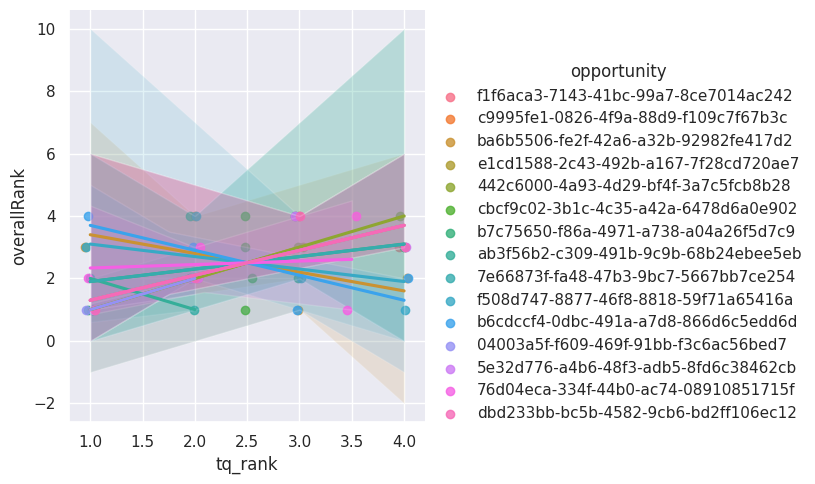

In [1470]:
# scatter plot
sns.set_theme(color_codes=True)
sns.lmplot(x='tq_rank',y='overallRank',hue='opportunity', data=df_sub,x_jitter=.05)

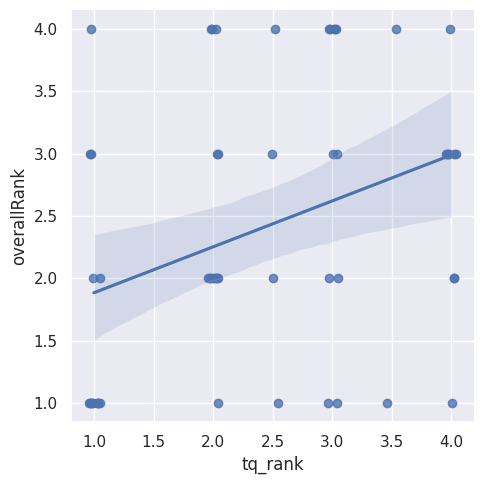

In [1471]:
sns.lmplot(x='tq_rank',y='overallRank', data=df_sub,x_jitter=.05)

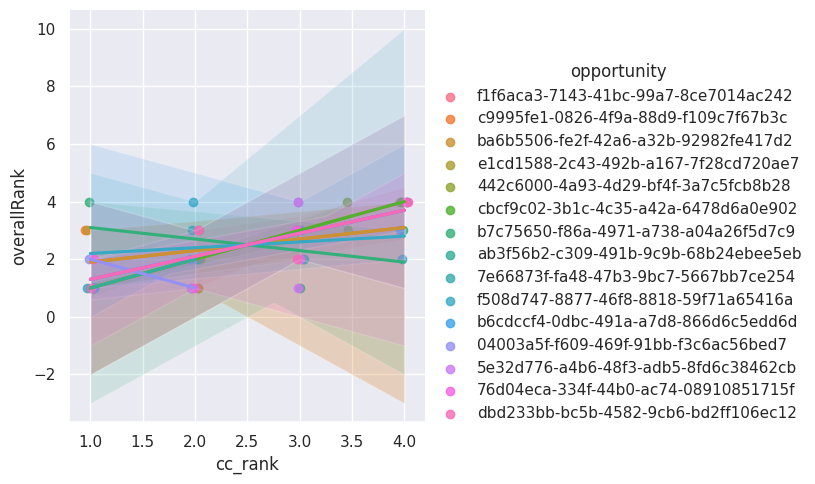

In [1472]:
# df_sub.plot(x='cc_rank', y='overallRank', kind='scatter', figsize=(5,5), color='blue');
# plt.figure(figsize=(10,6))
# sns.scatterplot(x='cc_rank',y='overallRank',hue='opportunity',data=df_sub)
# plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# plt.tight_layout()
sns.lmplot(x='cc_rank',y='overallRank',hue='opportunity', data=df_sub,x_jitter=.05)

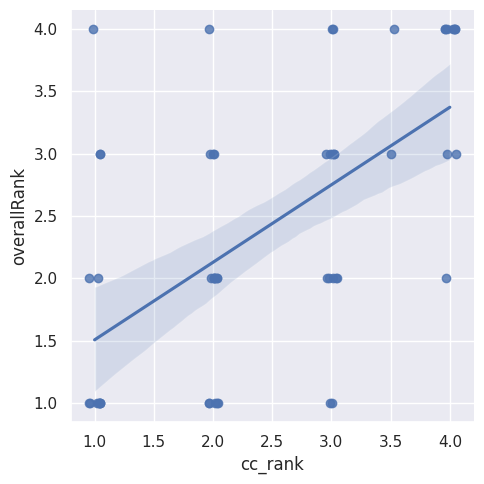

In [1473]:
sns.lmplot(x='cc_rank',y='overallRank', data=df_sub,x_jitter=.05)

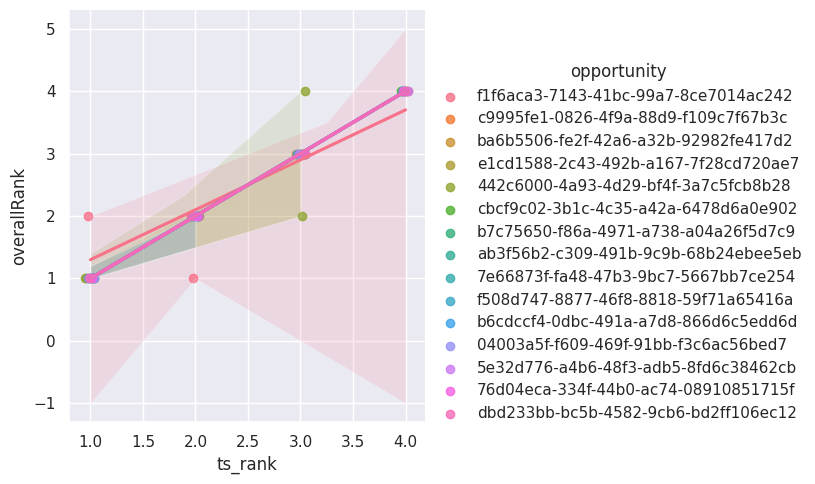

In [1474]:
#df_sub.plot(x='ts_rank', y='overallRank', kind='scatter', figsize=(5,5), color='blue');
# plt.figure(figsize=(10,6))
# sns.scatterplot(x='ts_rank',y='overallRank',hue='opportunity',data=df_sub)
# plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# plt.tight_layout()
# sns.regplot(x=df_sub['tq_rank'],y=df_sub['overallRank'])
sns.lmplot(x='ts_rank',y='overallRank',hue='opportunity', data=df_sub,x_jitter=.05)

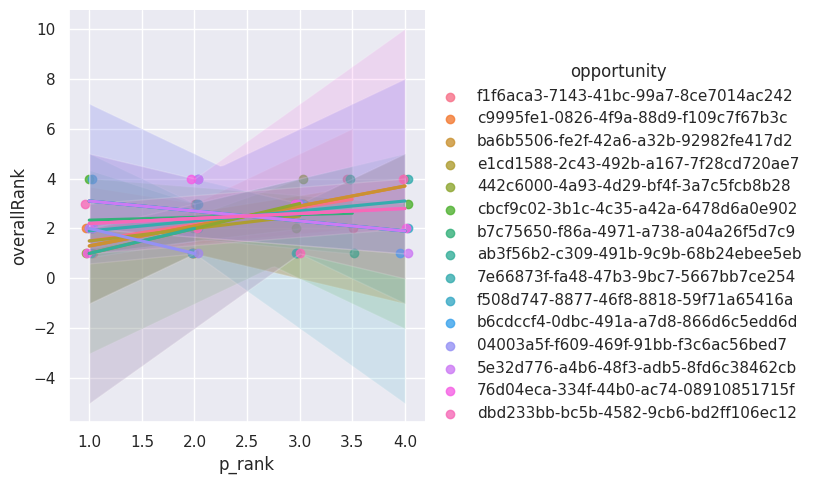

In [1475]:
# df_sub.plot(x='p_rank', y='overallRank', kind='scatter', figsize=(5,5), color='blue');
# plt.figure(figsize=(10,6))
# sns.scatterplot(x='p_rank',y='overallRank',hue='opportunity',data=df_sub)
# plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# plt.tight_layout()
sns.lmplot(x='p_rank',y='overallRank',hue='opportunity', data=df_sub,x_jitter=.05)

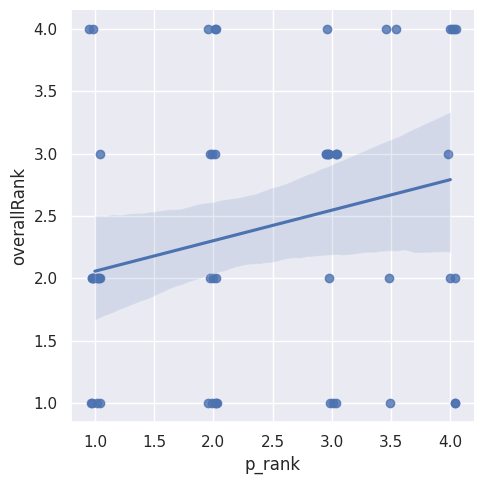

In [1476]:
sns.lmplot(x='p_rank',y='overallRank', data=df_sub,x_jitter=.05)
